In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 모든 경고 메시지 끄기
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

#데이터 불러오기

In [ ]:
origin=pd.read_csv('/content/drive/MyDrive/1988부터2023년기본기온데이터.csv')
iter=pd.read_csv('/content/drive/MyDrive/기상보간iter.csv')
linear=pd.read_csv('/content/drive/MyDrive/기상보간linear.csv')

In [ ]:
# 0으로 대체
fill_values = {'안개 계속시간(hr)': 0,
                '합계 3시간 신적설(cm)': 0,
                '일 최심적설(cm)': 0,
                '일 최심신적설(cm)': 0,
                '일강수량(mm)': 0,
                '강수 계속시간(hr)':0
              }

origin.fillna(value = fill_values, inplace = True)

In [ ]:
print(origin.columns)
print(iter.columns,len(iter.columns))
print(linear.columns,len(linear.columns))

col=iter.select_dtypes(include=['number']).columns.tolist() ;col.remove('해양')
print(col)

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온

#분포 시각화

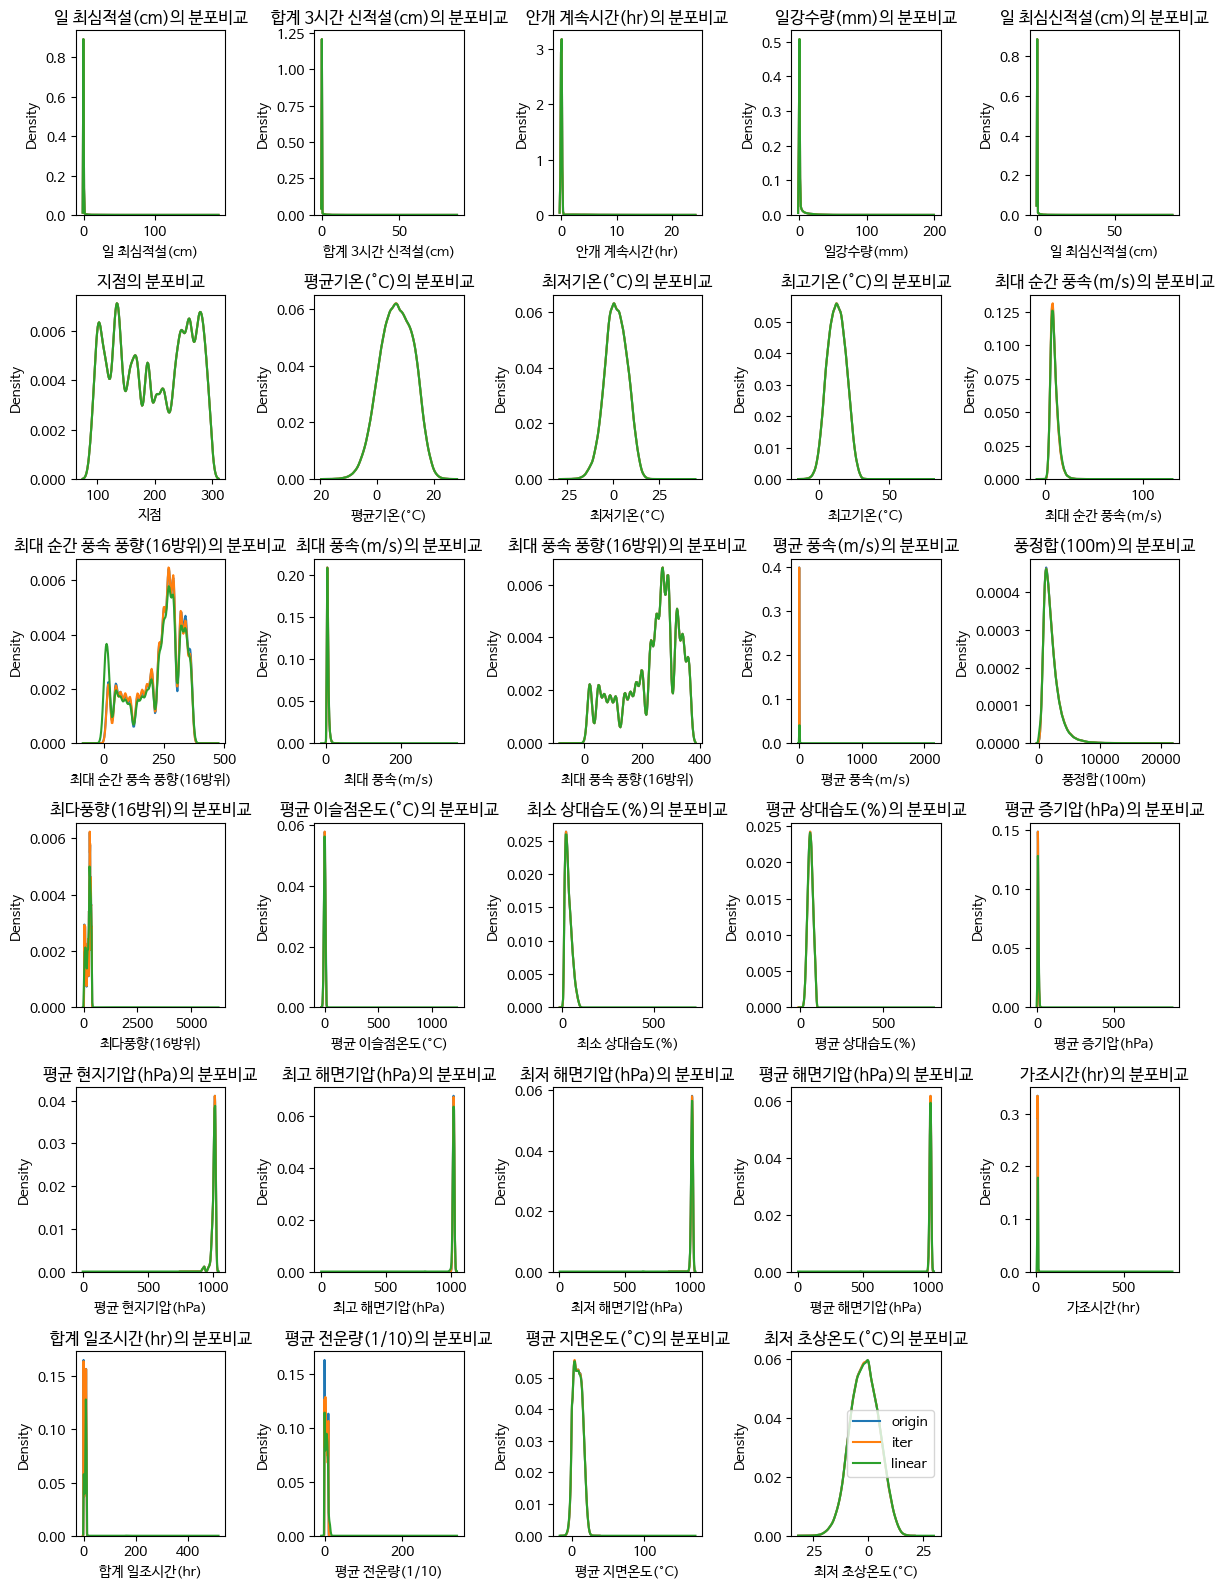

In [ ]:
plt.figure(figsize=(12,16))
for i,var in enumerate(col,1):
  plt.subplot(6, 5, i)
  sns.kdeplot(origin,x=var,label='origin')
  sns.kdeplot(iter, x=var,label='iter')
  sns.kdeplot(linear,x=var,label='linear')
  plt.title('{}의 분포비교'.format(var))

plt.legend()
plt.tight_layout()
plt.show()

#분포 검정(ks-test)

In [ ]:
from scipy.stats import kstest
# 귀무가설 : 두 개의 데이터의 분포가 동일

In [ ]:
import numpy as np
from scipy import stats

list(stats.kstest(stats.uniform.rvs(size=100, random_state=101),
             stats.norm.cdf))[1]

3.602464524245585e-24

##iterativeImputer를 사용한 경우

In [ ]:
diff=[]
for i in col:
  p_value=list(stats.ks_2samp(origin[i],iter[i]))[1]
  if p_value>0.05:
    print(f'{i}:두 분포가 동일합니다')
  else:
    print(f'{i}:두 분포가 다릅니다')
    diff.append(i)

일 최심적설(cm):두 분포가 동일합니다
합계 3시간 신적설(cm):두 분포가 동일합니다
안개 계속시간(hr):두 분포가 동일합니다
일강수량(mm):두 분포가 동일합니다
일 최심신적설(cm):두 분포가 동일합니다
지점:두 분포가 동일합니다
평균기온(°C):두 분포가 동일합니다
최저기온(°C):두 분포가 동일합니다
최고기온(°C):두 분포가 동일합니다
최대 순간 풍속(m/s):두 분포가 다릅니다
최대 순간 풍속 풍향(16방위):두 분포가 다릅니다
최대 풍속(m/s):두 분포가 동일합니다
최대 풍속 풍향(16방위):두 분포가 동일합니다
평균 풍속(m/s):두 분포가 동일합니다
풍정합(100m):두 분포가 다릅니다
최다풍향(16방위):두 분포가 다릅니다
평균 이슬점온도(°C):두 분포가 동일합니다
최소 상대습도(%):두 분포가 동일합니다
평균 상대습도(%):두 분포가 동일합니다
평균 증기압(hPa):두 분포가 동일합니다
평균 현지기압(hPa):두 분포가 동일합니다
최고 해면기압(hPa):두 분포가 다릅니다
최저 해면기압(hPa):두 분포가 다릅니다
평균 해면기압(hPa):두 분포가 동일합니다
가조시간(hr):두 분포가 동일합니다
합계 일조시간(hr):두 분포가 동일합니다
평균 전운량(1/10):두 분포가 다릅니다
평균 지면온도(°C):두 분포가 다릅니다
최저 초상온도(°C):두 분포가 다릅니다


In [ ]:
print(diff)

['최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '풍정합(100m)', '최다풍향(16방위)', '최고 해면기압(hPa)', '최저 해면기압(hPa)', '평균 전운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)']


## 선형보간의 경우

In [ ]:
diff2=[]
for i in col:
  p_value=list(stats.ks_2samp(origin[i],linear[i]))[1]
  if p_value>0.05:
    print(f'{i}:두 분포가 동일합니다')
  else:
    print(f'{i}:두 분포가 다릅니다')
    diff2.append(i)

일 최심적설(cm):두 분포가 동일합니다
합계 3시간 신적설(cm):두 분포가 동일합니다
안개 계속시간(hr):두 분포가 동일합니다
일강수량(mm):두 분포가 동일합니다
일 최심신적설(cm):두 분포가 동일합니다
지점:두 분포가 동일합니다
평균기온(°C):두 분포가 동일합니다
최저기온(°C):두 분포가 동일합니다
최고기온(°C):두 분포가 동일합니다
최대 순간 풍속(m/s):두 분포가 다릅니다
최대 순간 풍속 풍향(16방위):두 분포가 다릅니다
최대 풍속(m/s):두 분포가 동일합니다
최대 풍속 풍향(16방위):두 분포가 동일합니다
평균 풍속(m/s):두 분포가 동일합니다
풍정합(100m):두 분포가 다릅니다
최다풍향(16방위):두 분포가 다릅니다
평균 이슬점온도(°C):두 분포가 동일합니다
최소 상대습도(%):두 분포가 동일합니다
평균 상대습도(%):두 분포가 동일합니다
평균 증기압(hPa):두 분포가 동일합니다
평균 현지기압(hPa):두 분포가 동일합니다
최고 해면기압(hPa):두 분포가 다릅니다
최저 해면기압(hPa):두 분포가 다릅니다
평균 해면기압(hPa):두 분포가 동일합니다
가조시간(hr):두 분포가 동일합니다
합계 일조시간(hr):두 분포가 동일합니다
평균 전운량(1/10):두 분포가 다릅니다
평균 지면온도(°C):두 분포가 다릅니다
최저 초상온도(°C):두 분포가 다릅니다


In [ ]:
print(diff2)

['최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '풍정합(100m)', '최다풍향(16방위)', '최고 해면기압(hPa)', '최저 해면기압(hPa)', '평균 전운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)']


# T 검정

In [ ]:
from scipy import stats

# 두 개의 샘플 데이터 생성 (예시)
sample1 = [25, 30, 35, 40, 45]
sample2 = [20, 30, 35, 38, 42]

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# p-value를 사용하여 가설을 평가
alpha = 0.05  # 유의수준 설정
if p_value < alpha:
    print("두 분포는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("두 분포는 통계적으로 유의미한 차이가 없습니다.")


두 분포는 통계적으로 유의미한 차이가 없습니다.


In [ ]:
diff=[]
for i in col:
  t_statistic, p_value = stats.ttest_ind(origin[i],iter[i])
  if p_value>0.05:
    print(f'{i}:두 분포가 동일합니다')
  else:
    print(f'{i}:두 분포가 다릅니다')
    diff.append(i)

일 최심적설(cm):두 분포가 동일합니다
합계 3시간 신적설(cm):두 분포가 동일합니다
안개 계속시간(hr):두 분포가 동일합니다
일강수량(mm):두 분포가 동일합니다
일 최심신적설(cm):두 분포가 동일합니다
지점:두 분포가 동일합니다
평균기온(°C):두 분포가 다릅니다
최저기온(°C):두 분포가 다릅니다
최고기온(°C):두 분포가 다릅니다
최대 순간 풍속(m/s):두 분포가 다릅니다
최대 순간 풍속 풍향(16방위):두 분포가 다릅니다
최대 풍속(m/s):두 분포가 다릅니다
최대 풍속 풍향(16방위):두 분포가 다릅니다
평균 풍속(m/s):두 분포가 다릅니다
풍정합(100m):두 분포가 다릅니다
최다풍향(16방위):두 분포가 다릅니다
평균 이슬점온도(°C):두 분포가 다릅니다
최소 상대습도(%):두 분포가 다릅니다
평균 상대습도(%):두 분포가 다릅니다
평균 증기압(hPa):두 분포가 다릅니다
평균 현지기압(hPa):두 분포가 다릅니다
최고 해면기압(hPa):두 분포가 다릅니다
최저 해면기압(hPa):두 분포가 다릅니다
평균 해면기압(hPa):두 분포가 다릅니다
가조시간(hr):두 분포가 다릅니다
합계 일조시간(hr):두 분포가 다릅니다
평균 전운량(1/10):두 분포가 다릅니다
평균 지면온도(°C):두 분포가 다릅니다
최저 초상온도(°C):두 분포가 다릅니다


In [ ]:
diff

['평균기온(°C)',
 '최저기온(°C)',
 '최고기온(°C)',
 '최대 순간 풍속(m/s)',
 '최대 순간 풍속 풍향(16방위)',
 '최대 풍속(m/s)',
 '최대 풍속 풍향(16방위)',
 '평균 풍속(m/s)',
 '풍정합(100m)',
 '최다풍향(16방위)',
 '평균 이슬점온도(°C)',
 '최소 상대습도(%)',
 '평균 상대습도(%)',
 '평균 증기압(hPa)',
 '평균 현지기압(hPa)',
 '최고 해면기압(hPa)',
 '최저 해면기압(hPa)',
 '평균 해면기압(hPa)',
 '가조시간(hr)',
 '합계 일조시간(hr)',
 '평균 전운량(1/10)',
 '평균 지면온도(°C)',
 '최저 초상온도(°C)']

# AD TEST

In [ ]:
from scipy import stats

# 샘플 데이터 (예시)
sample1 = [2.5, 3.0, 3.2, 3.8, 4.0, 4.5, 4.8, 5.0]
sample2 = [3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9]

# Anderson-Darling k-샘플 검정 수행
result = stats.anderson_ksamp([sample1, sample2])

# 결과 출력
print("Anderson-Darling 통계량:", result.statistic)
print("p-값:", result.significance_level)

# 결과 해석
alpha = 0.05  # 유의수준
if result.significance_level < alpha:
    print("두 샘플은 통계적으로 유의미한 차이가 있습니다.")
else:
    print("두 샘플 간에는 유의미한 차이가 없습니다.")


Anderson-Darling 통계량: 1.235217940602964
p-값: 0.10072272499056806
두 샘플 간에는 유의미한 차이가 없습니다.


In [ ]:
diff=[]
for i in col:
  result = stats.anderson_ksamp([origin[i],iter[i]])
  p_value= result.significance_level
  if p_value>0.05:
    print(f'{i}:두 분포가 동일합니다')
  else:
    print(f'{i}:두 분포가 다릅니다')
    diff.append(i)

일 최심적설(cm):두 분포가 동일합니다
합계 3시간 신적설(cm):두 분포가 동일합니다
안개 계속시간(hr):두 분포가 동일합니다
일강수량(mm):두 분포가 동일합니다
일 최심신적설(cm):두 분포가 동일합니다
지점:두 분포가 동일합니다
평균기온(°C):두 분포가 동일합니다
최저기온(°C):두 분포가 동일합니다
최고기온(°C):두 분포가 동일합니다
최대 순간 풍속(m/s):두 분포가 다릅니다
최대 순간 풍속 풍향(16방위):두 분포가 다릅니다
최대 풍속(m/s):두 분포가 동일합니다
최대 풍속 풍향(16방위):두 분포가 동일합니다
평균 풍속(m/s):두 분포가 동일합니다
풍정합(100m):두 분포가 다릅니다
최다풍향(16방위):두 분포가 다릅니다
평균 이슬점온도(°C):두 분포가 동일합니다
최소 상대습도(%):두 분포가 동일합니다
평균 상대습도(%):두 분포가 동일합니다
평균 증기압(hPa):두 분포가 동일합니다
평균 현지기압(hPa):두 분포가 동일합니다
최고 해면기압(hPa):두 분포가 다릅니다
최저 해면기압(hPa):두 분포가 다릅니다
평균 해면기압(hPa):두 분포가 동일합니다
가조시간(hr):두 분포가 다릅니다
합계 일조시간(hr):두 분포가 다릅니다
평균 전운량(1/10):두 분포가 다릅니다
평균 지면온도(°C):두 분포가 다릅니다
최저 초상온도(°C):두 분포가 다릅니다


In [ ]:
diff

['최대 순간 풍속(m/s)',
 '최대 순간 풍속 풍향(16방위)',
 '풍정합(100m)',
 '최다풍향(16방위)',
 '최고 해면기압(hPa)',
 '최저 해면기압(hPa)',
 '가조시간(hr)',
 '합계 일조시간(hr)',
 '평균 전운량(1/10)',
 '평균 지면온도(°C)',
 '최저 초상온도(°C)']